In [1]:
import pandas as pd
import numpy as np

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import date_fixer

from googletrans import Translator

In [2]:
#example using translator Arabic to Engligh
translator = Translator()

translation = translator.translate("مرحبا كيف حالك؟",  dest='en')
translation.text

'Hello how are you?'

In [3]:
#example using translator English to Arabic
translator = Translator()

translation = translator.translate("Hello, how are you?",  dest='ar')
translation.text

'مرحبًاّ! كيف حالك؟'

In [4]:
df = pd.read_csv('daily8_2.csv')
new = date_fixer.make_datetime(df)

TRN_ARB_0297955 successful
TRN_ARB_0297957 successful
TRN_ARB_0297958 successful
TRN_ARB_0297960 successful
TRN_ARB_0297984 successful
TRN_ARB_0297985 successful
TRN_ARB_0298009 successful
TRN_ARB_0298010 successful
TRN_ARB_0298011 successful
TRN_ARB_0298015 successful
TRN_ARB_0298017 successful
TRN_ARB_0298018 successful
TRN_ARB_0298039 successful
TRN_ARB_0298057 successful
TRN_ARB_0298060 successful
TRN_ARB_0298061 successful
TRN_ARB_0298062 successful
TRN_ARB_0298063 successful
TRN_ARB_0298065 successful
TRN_ARB_0298067 successful
TRN_ARB_0298068 successful
TRN_ARB_0298071 successful
TRN_ARB_0298072 successful
TRN_ARB_0298073 successful
TRN_ARB_0298074 successful
TRN_ARB_0298088 successful
TRN_ARB_0298128 successful
TRN_ARB_0298130 successful
TRN_ARB_0298134 successful
TRN_ARB_0298153 successful
TRN_ARB_0298162 successful
TRN_ARB_0298163 successful
TRN_ARB_0298165 successful
TRN_ARB_0298171 successful
TRN_ARB_0298173 successful
TRN_ARB_0298176 successful
TRN_ARB_0298178 successful
T

YM7_ARB_0470925 successful
YM7_ARB_0470935 successful
YM7_ARB_0470940 successful
YM7_ARB_0470970 successful
YM7_ARB_0470980 successful
YM7_ARB_0470981 successful
YM7_ARB_0470988 successful
YM7_ARB_0470989 successful
YM7_ARB_0470999 successful
YM7_ARB_0471027 successful
YM7_ARB_0471048 successful
YM7_ARB_0471050 successful
YM7_ARB_0471071 successful
YM7_ARB_0471097 successful
YM7_ARB_0471102 successful
YM7_ARB_0471111 successful
YM7_ARB_0471115 successful
YM7_ARB_0471118 successful
YM7_ARB_0471121 successful
YM7_ARB_0471123 successful
YM7_ARB_0471164 successful
YM7_ARB_0471170 successful
YM7_ARB_0471174 successful
YM7_ARB_0471181 successful
YM7_ARB_0471182 successful
YM7_ARB_0471205 successful
YM7_ARB_0471208 successful
YM7_ARB_0471221 successful
YM7_ARB_0471228 successful
YM7_ARB_0471264 successful
YM7_ARB_0471298 successful
YM7_ARB_0471310 successful
YM7_ARB_0471314 successful
YM7_ARB_0471380 successful
YM7_ARB_0471381 successful
YM7_ARB_0471394 successful
YM7_ARB_0471425 successful
Y

SYM_ARB_0080183 successful
SYM_ARB_0080203 successful
SYM_ARB_0080217 successful
SYM_ARB_0080231 successful
SYM_ARB_0080260 successful
SYM_ARB_0080261 successful
SYM_ARB_0080262 successful
SYM_ARB_0080269 successful
SYM_ARB_0080274 successful
SYM_ARB_0080285 successful
SYM_ARB_0080302 successful
SYM_ARB_0080306 successful
SYM_ARB_0080307 successful
SYM_ARB_0080308 successful
SYM_ARB_0080309 successful
SYM_ARB_0080311 successful
SYM_ARB_0080312 successful
SYM_ARB_0080313 successful
SYM_ARB_0080316 successful
SYM_ARB_0080317 successful
SYM_ARB_0080321 successful
SYM_ARB_0080322 successful
SYM_ARB_0080330 successful
SYM_ARB_0080359 successful
SYM_ARB_0080386 successful
SYM_ARB_0080398 successful
SYM_ARB_0080414 successful
SYM_ARB_0080422 successful
SYM_ARB_0080435 successful
SYM_ARB_0080473 successful
SYM_ARB_0080474 successful
SYM_ARB_0080476 successful
SYM_ARB_0080480 successful
SYM_ARB_0080526 successful
SYM_ARB_0080534 successful
SYM_ARB_0080569 successful
SYM_ARB_0080581 successful
S

MSY_ARB_0094667 successful
MSY_ARB_0094673 successful
MSY_ARB_0094675 successful
MSY_ARB_0094686 successful
MSY_ARB_0094689 successful
MSY_ARB_0094708 successful
MSY_ARB_0094721 successful
MSY_ARB_0094722 successful
MSY_ARB_0094743 successful
MSY_ARB_0094800 successful
MSY_ARB_0094809 successful
MSY_ARB_0094873 successful
MSY_ARB_0094878 successful
MSY_ARB_0094894 successful
MSY_ARB_0094930 successful
MSY_ARB_0094931 successful
MSY_ARB_0094933 successful
MSY_ARB_0094944 successful
MSY_ARB_0094947 successful
MSY_ARB_0094957 successful
MSY_ARB_0094958 successful
MSY_ARB_0094966 successful
MSY_ARB_0094967 successful
MSY_ARB_0094971 successful
MSY_ARB_0094995 successful
MSY_ARB_0095007 successful
MSY_ARB_0095023 successful
MSY_ARB_0095033 successful
MSY_ARB_0095041 successful
MSY_ARB_0095055 successful
MSY_ARB_0095056 successful
MSY_ARB_0095081 successful
MSY_ARB_0095082 successful
MSY_ARB_0095085 successful
MSY_ARB_0095087 successful
MSY_ARB_0095091 successful
MSY_ARB_0095092 successful
M

MSY_ARB_0180801 successful
MSY_ARB_0180816 successful
MSY_ARB_0180823 successful
MSY_ARB_0180856 successful
MSY_ARB_0180883 successful
MSY_ARB_0180884 successful
MSY_ARB_0180897 successful
MSY_ARB_0180901 successful
MSY_ARB_0180923 successful
MSY_ARB_0180926 successful
MSY_ARB_0180938 successful
MSY_ARB_0180944 successful
MSY_ARB_0180953 successful
MSY_ARB_0180956 successful
MSY_ARB_0180957 successful
MSY_ARB_0180970 successful
MSY_ARB_0180983 successful
MSY_ARB_0180997 successful
MSY_ARB_0181000 successful
MSY_ARB_0181002 successful
MSY_ARB_0181004 successful
MSY_ARB_0181013 successful
MSY_ARB_0181015 successful
MSY_ARB_0181036 successful
MSY_ARB_0181062 successful
MSY_ARB_0181064 successful
MSY_ARB_0181066 successful
MSY_ARB_0181068 successful
MSY_ARB_0181092 successful
MSY_ARB_0181094 successful
MSY_ARB_0181095 successful
MSY_ARB_0181097 successful
MSY_ARB_0181101 successful
MSY_ARB_0181114 successful
MSY_ARB_0181130 successful
MSY_ARB_0181146 successful
MSY_ARB_0181147 successful
M

YM7_ARB_0971297 successful
YM7_ARB_0971298 successful
YM7_ARB_0971355 successful
YM7_ARB_0971364 successful
YM7_ARB_0971368 successful
YM7_ARB_0971371 successful
YM7_ARB_0971477 successful
YM7_ARB_0971506 successful
YM7_ARB_0971522 successful
YM7_ARB_0971570 successful
YM7_ARB_0971597 successful
YM7_ARB_0971648 successful
YM7_ARB_0971720 successful
YM7_ARB_0971748 successful
YM7_ARB_0971778 successful
YM7_ARB_0971903 successful
YM7_ARB_0971952 successful
YM7_ARB_0972014 successful
YM7_ARB_0972081 successful
YM7_ARB_0972216 successful
YM7_ARB_0972226 successful
YM7_ARB_0972342 successful
YM7_ARB_0972385 successful
YM7_ARB_0972404 successful
YM7_ARB_0972476 successful
YM7_ARB_0972477 successful
YM7_ARB_0972503 successful
YM7_ARB_0972529 successful
YM7_ARB_0972542 successful
YM7_ARB_0972557 successful
YM7_ARB_0972567 successful
YM7_ARB_0972573 successful
YM7_ARB_0972708 successful
YM7_ARB_0972796 successful
YM7_ARB_0972804 successful
YM7_ARB_0972807 successful
YM7_ARB_0972815 successful
Y

ETD_ARB_0109214 successful
ETD_ARB_0109240 successful
ETD_ARB_0109249 successful
ETD_ARB_0109279 successful
ETD_ARB_0109282 successful
ETD_ARB_0109341 successful
ETD_ARB_0109359 successful
ETD_ARB_0109372 successful
ETD_ARB_0109373 successful
ETD_ARB_0109374 successful
ETD_ARB_0109375 successful
ETD_ARB_0109377 successful
ETD_ARB_0109388 successful
ETD_ARB_0109389 successful
ETD_ARB_0109390 successful
ETD_ARB_0109392 successful
ETD_ARB_0109394 successful
ETD_ARB_0109448 successful
ETD_ARB_0109505 successful
ETD_ARB_0109515 successful
ETD_ARB_0109542 successful
ETD_ARB_0109546 successful
ETD_ARB_0109556 successful
ETD_ARB_0109557 successful
ETD_ARB_0109558 successful
ETD_ARB_0109560 successful
ETD_ARB_0109561 successful
ETD_ARB_0109562 successful
ETD_ARB_0109569 successful
ETD_ARB_0109615 successful
ETD_ARB_0109617 successful
ETD_ARB_0109636 successful
ETD_ARB_0109642 successful
ETD_ARB_0109646 successful
ETD_ARB_0109652 successful
ETD_ARB_0109694 successful
ETD_ARB_0109717 successful
E

MTL_ARB_0219637 successful
MTL_ARB_0219661 successful
MTL_ARB_0219718 successful
MTL_ARB_0219733 successful
MTL_ARB_0219734 successful
MTL_ARB_0219742 successful
MTL_ARB_0219743 successful
MTL_ARB_0219744 successful
MTL_ARB_0219746 successful
MTL_ARB_0219748 successful
MTL_ARB_0219749 successful
MTL_ARB_0219750 successful
MTL_ARB_0219759 successful
MTL_ARB_0219764 successful
MTL_ARB_0219769 successful
MTL_ARB_0219783 successful
MTL_ARB_0219785 successful
MTL_ARB_0219786 successful
MTL_ARB_0219788 successful
MTL_ARB_0219790 successful
MTL_ARB_0219794 successful
MTL_ARB_0219795 successful
MTL_ARB_0219835 successful
MTL_ARB_0219839 successful
MTL_ARB_0219841 successful
MTL_ARB_0219842 successful
MTL_ARB_0219849 successful
MTL_ARB_0219850 successful
MTL_ARB_0219858 successful
MTL_ARB_0219876 successful
MTL_ARB_0219880 successful
MTL_ARB_0219905 successful
MTL_ARB_0219937 successful
MTL_ARB_0219963 successful
MTL_ARB_0220002 successful
MTL_ARB_0220030 successful
MTL_ARB_0220033 successful
M

TRN_ARB_0230284 successful
TRN_ARB_0230285 successful
TRN_ARB_0230336 successful
TRN_ARB_0230354 successful
TRN_ARB_0230367 successful
TRN_ARB_0230383 successful
TRN_ARB_0230385 successful
TRN_ARB_0230386 successful
TRN_ARB_0230387 successful
TRN_ARB_0230396 successful
TRN_ARB_0230397 successful
TRN_ARB_0230398 successful
TRN_ARB_0230428 successful
TRN_ARB_0230438 successful
TRN_ARB_0230464 successful
TRN_ARB_0230469 successful
TRN_ARB_0230472 successful
TRN_ARB_0230517 successful
TRN_ARB_0230518 successful
TRN_ARB_0230519 successful
TRN_ARB_0230522 successful
TRN_ARB_0230552 successful
TRN_ARB_0230556 successful
TRN_ARB_0230575 successful
TRN_ARB_0230576 successful
TRN_ARB_0230631 successful
TRN_ARB_0230655 successful
TRN_ARB_0230659 successful
MSY_ARB_0199072 successful
MSY_ARB_0199073 successful
MSY_ARB_0199074 successful
MSY_ARB_0199077 successful
MSY_ARB_0199078 successful
MSY_ARB_0199086 successful
MSY_ARB_0199115 successful
MSY_ARB_0199119 successful
MSY_ARB_0199120 successful
M

YM7_ARB_0666054 successful
YM7_ARB_0666077 successful
YM7_ARB_0666082 successful
YM7_ARB_0666094 successful
YM7_ARB_0666119 successful
YM7_ARB_0666142 successful
YM7_ARB_0666184 successful
YM7_ARB_0666191 successful
YM7_ARB_0666193 successful
YM7_ARB_0666226 successful
YM7_ARB_0666288 successful
YM7_ARB_0666327 successful
YM7_ARB_0666370 successful
YM7_ARB_0666381 successful
YM7_ARB_0666419 successful
YM7_ARB_0666436 successful
YM7_ARB_0666453 successful
YM7_ARB_0666487 successful
YM7_ARB_0666531 successful
YM7_ARB_0666541 successful
YM7_ARB_0666552 successful
YM7_ARB_0666596 successful
YM7_ARB_0666600 successful
YM7_ARB_0666608 successful
YM7_ARB_0666613 successful
YM7_ARB_0666646 successful
YM7_ARB_0666659 successful
YM7_ARB_0666667 successful
YM7_ARB_0666669 successful
YM7_ARB_0666702 successful
YM7_ARB_0666711 successful
YM7_ARB_0666716 successful
YM7_ARB_0666721 successful
YM7_ARB_0666724 successful
YM7_ARB_0666746 successful
YM7_ARB_0666758 successful
YM7_ARB_0666782 successful
Y

MTL_ARB_0128974 successful
MTL_ARB_0128979 successful
MTL_ARB_0128980 successful
MTL_ARB_0128989 successful
MTL_ARB_0129004 successful
MTL_ARB_0129005 successful
MTL_ARB_0129007 successful
MTL_ARB_0129011 successful
MTL_ARB_0129013 successful
MTL_ARB_0129024 successful
MTL_ARB_0129032 successful
MTL_ARB_0129044 successful
MTL_ARB_0129063 successful
MTL_ARB_0129093 successful
MTL_ARB_0129110 successful
MTL_ARB_0129112 successful
MTL_ARB_0129117 successful
MTL_ARB_0129118 successful
MTL_ARB_0129125 successful
MTL_ARB_0129128 successful
MTL_ARB_0129132 successful
MTL_ARB_0129139 successful
MTL_ARB_0129140 successful
MTL_ARB_0129146 successful
MTL_ARB_0129173 successful
MTL_ARB_0129186 successful
MTL_ARB_0129199 successful
MTL_ARB_0129200 successful
MTL_ARB_0129210 successful
MTL_ARB_0129212 successful
MTL_ARB_0129213 successful
MTL_ARB_0129215 successful
MTL_ARB_0129238 successful
MTL_ARB_0129239 successful
MTL_ARB_0129240 successful
MTL_ARB_0129243 successful
MTL_ARB_0129279 successful
M

MSY_ARB_0029215 successful
MSY_ARB_0029227 successful
MSY_ARB_0029233 successful
MSY_ARB_0029236 successful
MSY_ARB_0029245 successful
MSY_ARB_0029250 successful
MSY_ARB_0029258 successful
MSY_ARB_0029286 successful
MSY_ARB_0029290 successful
MSY_ARB_0029301 successful
MSY_ARB_0029306 successful
MSY_ARB_0029342 successful
MSY_ARB_0029344 successful
MSY_ARB_0029349 successful
MSY_ARB_0029378 successful
MSY_ARB_0029383 successful
MSY_ARB_0029386 successful
MSY_ARB_0029387 successful
MSY_ARB_0029393 successful
MSY_ARB_0029395 successful
MSY_ARB_0029400 successful
MSY_ARB_0029450 successful
MSY_ARB_0029458 successful
MSY_ARB_0029459 successful
MSY_ARB_0029460 successful
MSY_ARB_0029461 successful
MSY_ARB_0029463 successful
MSY_ARB_0029467 successful
MSY_ARB_0029477 successful
MSY_ARB_0029485 successful
MSY_ARB_0029501 successful
MSY_ARB_0029508 successful
MSY_ARB_0029518 successful
MSY_ARB_0029524 successful
MSY_ARB_0029547 successful
MSY_ARB_0029550 successful
MSY_ARB_0029580 successful
M

QBS_ARB_0809337 successful
QBS_ARB_0809344 successful
QBS_ARB_0809345 successful
QBS_ARB_0809351 successful
QBS_ARB_0809354 successful
QBS_ARB_0809358 successful
QBS_ARB_0809359 successful
QBS_ARB_0809363 successful
QBS_ARB_0809372 successful
QBS_ARB_0809407 successful
QBS_ARB_0809418 successful
QBS_ARB_0809446 successful
QBS_ARB_0809451 successful
QBS_ARB_0809480 successful
QBS_ARB_0809483 successful
QBS_ARB_0809495 successful
QBS_ARB_0809497 successful
QBS_ARB_0809523 successful
QBS_ARB_0809527 successful
QBS_ARB_0809583 successful
QBS_ARB_0809595 successful
QBS_ARB_0809597 successful
QBS_ARB_0809611 successful
QBS_ARB_0809615 successful
QBS_ARB_0809616 successful
QBS_ARB_0809625 successful
QBS_ARB_0809637 successful
QBS_ARB_0809645 successful
QBS_ARB_0809655 successful
QBS_ARB_0809660 successful
QBS_ARB_0809665 successful
QBS_ARB_0809688 successful
QBS_ARB_0809692 successful
QBS_ARB_0809700 successful
QBS_ARB_0809760 successful
QBS_ARB_0809778 successful
QBS_ARB_0809779 successful
Q

ETD_ARB_0066549 successful
ETD_ARB_0066552 successful
ETD_ARB_0066554 successful
ETD_ARB_0066558 successful
ETD_ARB_0066561 successful
ETD_ARB_0066569 successful
ETD_ARB_0066570 successful
ETD_ARB_0066573 successful
ETD_ARB_0066581 successful
ETD_ARB_0066582 successful
ETD_ARB_0066584 successful
ETD_ARB_0066599 successful
ETD_ARB_0066620 successful
ETD_ARB_0066681 successful
ETD_ARB_0066683 successful
ETD_ARB_0066685 successful
ETD_ARB_0066689 successful
ETD_ARB_0066691 successful
ETD_ARB_0066692 successful
ETD_ARB_0066694 successful
ETD_ARB_0066695 successful
ETD_ARB_0066698 successful
ETD_ARB_0066708 successful
ETD_ARB_0066742 successful
ETD_ARB_0066743 successful
ETD_ARB_0066759 successful
ETD_ARB_0066768 successful
ETD_ARB_0066769 successful
ETD_ARB_0066771 successful
ETD_ARB_0066797 successful
ETD_ARB_0066798 successful
ETD_ARB_0066799 successful
ETD_ARB_0066805 successful
ETD_ARB_0066808 successful
ETD_ARB_0066809 successful
ETD_ARB_0066811 successful
ETD_ARB_0066815 successful
E

MTL_ARB_0332132 successful
MTL_ARB_0332141 successful
MTL_ARB_0332142 successful
MTL_ARB_0332143 successful
MTL_ARB_0332144 successful
MTL_ARB_0332147 successful
MTL_ARB_0332148 successful
MTL_ARB_0332150 successful
MTL_ARB_0332152 successful
MTL_ARB_0332154 successful
MTL_ARB_0332161 successful
MTL_ARB_0332166 successful
MTL_ARB_0332167 successful
MTL_ARB_0332197 successful
MTL_ARB_0332198 successful
MTL_ARB_0332292 successful
MTL_ARB_0332295 successful
MTL_ARB_0332298 successful
MTL_ARB_0332300 successful
MTL_ARB_0332306 successful
MTL_ARB_0332307 successful
MTL_ARB_0332309 successful
MTL_ARB_0332312 successful
MTL_ARB_0332313 successful
MTL_ARB_0332315 successful
MTL_ARB_0332320 successful
MTL_ARB_0332321 successful
MTL_ARB_0332322 successful
MTL_ARB_0332336 successful
MTL_ARB_0332345 successful
MTL_ARB_0332367 successful
MTL_ARB_0332377 successful
MTL_ARB_0332395 successful
MTL_ARB_0332409 successful
MTL_ARB_0332411 successful
MTL_ARB_0332417 successful
MTL_ARB_0332426 successful
M

MTL_ARB_0203813 successful
MTL_ARB_0203826 successful
MTL_ARB_0203828 successful
MTL_ARB_0203875 successful
MTL_ARB_0203913 successful
MTL_ARB_0203919 successful
MTL_ARB_0203920 successful
MTL_ARB_0203923 successful
MTL_ARB_0203988 successful
MTL_ARB_0204001 successful
MTL_ARB_0204021 successful
MTL_ARB_0204022 successful
MTL_ARB_0204029 successful
MTL_ARB_0204047 successful
MTL_ARB_0204052 successful
MTL_ARB_0204066 successful
MTL_ARB_0204132 successful
MTL_ARB_0204156 successful
MTL_ARB_0204159 successful
MTL_ARB_0204161 successful
MTL_ARB_0204164 successful
MTL_ARB_0204168 successful
MTL_ARB_0204212 successful
MTL_ARB_0204216 successful
MTL_ARB_0204222 successful
MTL_ARB_0204223 successful
MTL_ARB_0204224 successful
MTL_ARB_0204227 successful
MTL_ARB_0204237 successful
MTL_ARB_0204246 successful
MTL_ARB_0204256 successful
MTL_ARB_0204261 successful
MTL_ARB_0204265 successful
MTL_ARB_0204277 successful
MTL_ARB_0204280 successful
MTL_ARB_0204282 successful
MTL_ARB_0204285 successful
M

TRN_ARB_0166875 successful
TRN_ARB_0166876 successful
TRN_ARB_0166884 successful
TRN_ARB_0166889 successful
TRN_ARB_0166902 successful
TRN_ARB_0166935 successful
TRN_ARB_0166936 successful
TRN_ARB_0166937 successful
TRN_ARB_0166939 successful
TRN_ARB_0166940 successful
TRN_ARB_0166941 successful
TRN_ARB_0166945 successful
TRN_ARB_0166947 successful
TRN_ARB_0166978 successful
TRN_ARB_0166986 successful
TRN_ARB_0167020 successful
TRN_ARB_0167025 successful
TRN_ARB_0167027 successful
TRN_ARB_0167029 successful
TRN_ARB_0167031 successful
TRN_ARB_0167033 successful
TRN_ARB_0167036 successful
TRN_ARB_0167037 successful
TRN_ARB_0167038 successful
TRN_ARB_0167040 successful
TRN_ARB_0167099 successful
TRN_ARB_0167100 successful
TRN_ARB_0167104 successful
TRN_ARB_0167112 successful
TRN_ARB_0167153 successful
TRN_ARB_0167154 successful
TRN_ARB_0167156 successful
TRN_ARB_0167158 successful
TRN_ARB_0167164 successful
TRN_ARB_0167172 successful
TRN_ARB_0167197 successful
TRN_ARB_0167207 successful
T

SBN_ARB_0028004 successful
SBN_ARB_0028032 successful
SBN_ARB_0028045 successful
SBN_ARB_0028084 successful
SBN_ARB_0028124 successful
SBN_ARB_0028149 successful
SBN_ARB_0028188 successful
SBN_ARB_0028218 successful
SBN_ARB_0028219 successful
SBN_ARB_0028233 successful
SBN_ARB_0028279 successful
SBN_ARB_0028282 successful
SBN_ARB_0028322 successful
SBN_ARB_0028324 successful
SBN_ARB_0028348 successful
SBN_ARB_0028350 successful
SBN_ARB_0028399 successful
SBN_ARB_0028430 successful
SBN_ARB_0028435 successful
SBN_ARB_0028452 successful
SBN_ARB_0028458 successful
SBN_ARB_0028460 successful
SBN_ARB_0028466 successful
SBN_ARB_0028537 successful
SBN_ARB_0028538 successful
SBN_ARB_0028545 successful
SBN_ARB_0028547 successful
SBN_ARB_0028560 successful
SBN_ARB_0028612 successful
SBN_ARB_0028624 successful
SBN_ARB_0028646 successful
SBN_ARB_0028651 successful
SBN_ARB_0028655 successful
SBN_ARB_0028672 successful
SBN_ARB_0028736 successful
SBN_ARB_0028762 successful
SBN_ARB_0028767 successful
S

ETD_ARB_0200091 successful
ETD_ARB_0200094 successful
ETD_ARB_0200103 successful
ETD_ARB_0200140 successful
ETD_ARB_0200159 successful
ETD_ARB_0200169 successful
ETD_ARB_0200207 successful
ETD_ARB_0200208 successful
ETD_ARB_0200214 successful
ETD_ARB_0200223 successful
ETD_ARB_0200276 successful
ETD_ARB_0200296 successful
ETD_ARB_0200304 successful
ETD_ARB_0200305 successful
ETD_ARB_0200307 successful
ETD_ARB_0200309 successful
ETD_ARB_0200318 successful
ETD_ARB_0200320 successful
ETD_ARB_0200324 successful
ETD_ARB_0200326 successful
ETD_ARB_0200327 successful
ETD_ARB_0200329 successful
ETD_ARB_0200330 successful
ETD_ARB_0200335 successful
ETD_ARB_0200350 successful
ETD_ARB_0200351 successful
ETD_ARB_0200355 successful
ETD_ARB_0200358 successful
ETD_ARB_0200361 successful
ETD_ARB_0200363 successful
ETD_ARB_0200364 successful
ETD_ARB_0200368 successful
ETD_ARB_0200369 successful
ETD_ARB_0200374 successful
ETD_ARB_0200401 successful
ETD_ARB_0200410 successful
ETD_ARB_0200412 successful
E

ETD_ARB_0191503 successful
ETD_ARB_0191514 successful
ETD_ARB_0191517 successful
ETD_ARB_0191523 successful
ETD_ARB_0191526 successful
ETD_ARB_0191532 successful
ETD_ARB_0191541 successful
ETD_ARB_0191543 successful
ETD_ARB_0191551 successful
ETD_ARB_0191559 successful
ETD_ARB_0191560 successful
ETD_ARB_0191561 successful
ETD_ARB_0191562 successful
ETD_ARB_0191569 successful
ETD_ARB_0191602 successful
ETD_ARB_0191614 successful
ETD_ARB_0191619 successful
ETD_ARB_0191714 successful
ETD_ARB_0191715 successful
ETD_ARB_0191716 successful
ETD_ARB_0191787 successful
ETD_ARB_0191800 successful
ETD_ARB_0191805 successful
ETD_ARB_0191806 successful
ETD_ARB_0191809 successful
ETD_ARB_0191811 successful
ETD_ARB_0191826 successful
ETD_ARB_0191827 successful
ETD_ARB_0191829 successful
ETD_ARB_0191830 successful
ETD_ARB_0191832 successful
ETD_ARB_0191834 successful
ETD_ARB_0191836 successful
ETD_ARB_0191837 successful
ETD_ARB_0191839 successful
ETD_ARB_0191840 successful
ETD_ARB_0191856 successful
E

MTL_ARB_0145657 successful
MTL_ARB_0145671 successful
MTL_ARB_0145705 successful
MTL_ARB_0145706 successful
MTL_ARB_0145707 successful
MTL_ARB_0145717 successful
MTL_ARB_0145719 successful
MTL_ARB_0145721 successful
MTL_ARB_0145730 successful
MTL_ARB_0145739 successful
MTL_ARB_0145751 successful
MTL_ARB_0145758 successful
MTL_ARB_0145775 successful
MTL_ARB_0145782 successful
RYD_ARB_0052458 successful
RYD_ARB_0052460 successful
RYD_ARB_0052462 successful
RYD_ARB_0052463 successful
RYD_ARB_0052476 successful
RYD_ARB_0052477 successful
RYD_ARB_0052479 successful
RYD_ARB_0052482 successful
RYD_ARB_0052507 successful
RYD_ARB_0052520 successful
RYD_ARB_0052522 successful
RYD_ARB_0052568 successful
RYD_ARB_0052600 successful
RYD_ARB_0052607 successful
RYD_ARB_0052618 successful
RYD_ARB_0052619 successful
RYD_ARB_0052648 successful
RYD_ARB_0052670 successful
RYD_ARB_0052683 successful
RYD_ARB_0052688 successful
RYD_ARB_0052696 successful
RYD_ARB_0052701 successful
RYD_ARB_0052705 successful
R

TRN_ARB_0200425 successful
TRN_ARB_0200428 successful
TRN_ARB_0200431 successful
TRN_ARB_0200440 successful
TRN_ARB_0200465 successful
TRN_ARB_0200474 successful
TRN_ARB_0200502 successful
TRN_ARB_0200504 successful
TRN_ARB_0200508 successful
TRN_ARB_0200522 successful
TRN_ARB_0200592 successful
TRN_ARB_0200596 successful
TRN_ARB_0200597 successful
TRN_ARB_0200600 successful
TRN_ARB_0200604 successful
TRN_ARB_0200605 successful
TRN_ARB_0200621 successful
TRN_ARB_0200626 successful
TRN_ARB_0200636 successful
TRN_ARB_0200642 successful
TRN_ARB_0200653 successful
TRN_ARB_0200679 successful
TRN_ARB_0200681 successful
TRN_ARB_0200682 successful
TRN_ARB_0200683 successful
TRN_ARB_0200684 successful
TRN_ARB_0200685 successful
TRN_ARB_0200689 successful
TRN_ARB_0200691 successful
TRN_ARB_0200693 successful
TRN_ARB_0200732 successful
TRN_ARB_0200733 successful
TRN_ARB_0200778 successful
TRN_ARB_0200793 successful
TRN_ARB_0200797 successful
TRN_ARB_0200844 successful
TRN_ARB_0200852 successful
T

YM7_ARB_0643865 successful
YM7_ARB_0643866 successful
YM7_ARB_0643999 successful
YM7_ARB_0644036 successful
YM7_ARB_0644065 successful
YM7_ARB_0644071 successful
YM7_ARB_0644073 successful
YM7_ARB_0644110 successful
YM7_ARB_0644111 successful
YM7_ARB_0644128 successful
YM7_ARB_0644129 successful
YM7_ARB_0644170 successful
YM7_ARB_0644192 successful
YM7_ARB_0644193 successful
YM7_ARB_0644236 successful
YM7_ARB_0644264 successful
YM7_ARB_0644265 successful
YM7_ARB_0644276 successful
YM7_ARB_0644287 successful
YM7_ARB_0644305 successful
YM7_ARB_0644314 successful
YM7_ARB_0644340 successful
YM7_ARB_0644367 successful
YM7_ARB_0644368 successful
YM7_ARB_0644379 successful
YM7_ARB_0644391 successful
YM7_ARB_0644392 successful
YM7_ARB_0644397 successful
YM7_ARB_0644423 successful
YM7_ARB_0644442 successful
YM7_ARB_0644467 successful
YM7_ARB_0644470 successful
YM7_ARB_0644482 successful
YM7_ARB_0644485 successful
YM7_ARB_0644486 successful
YM7_ARB_0644487 successful
YM7_ARB_0644500 successful
Y

MSY_ARB_0214751 successful
MSY_ARB_0214753 successful
MSY_ARB_0214759 successful
MSY_ARB_0214771 successful
MSY_ARB_0214793 successful
MSY_ARB_0214800 successful
MSY_ARB_0214804 successful
MSY_ARB_0214815 successful
MSY_ARB_0214833 successful
MSY_ARB_0214835 successful
MSY_ARB_0214858 successful
MSY_ARB_0214866 successful
MSY_ARB_0214874 successful
MSY_ARB_0214881 successful
MSY_ARB_0214915 successful
MSY_ARB_0214916 successful
MSY_ARB_0214918 successful
MSY_ARB_0214919 successful
MSY_ARB_0214939 successful
MSY_ARB_0214957 successful
MSY_ARB_0214963 successful
MSY_ARB_0214965 successful
MSY_ARB_0214968 successful
MSY_ARB_0214986 successful
MSY_ARB_0214990 successful
MSY_ARB_0214996 successful
MSY_ARB_0215007 successful
MSY_ARB_0215013 successful
MSY_ARB_0215015 successful
MSY_ARB_0215037 successful
MSY_ARB_0215054 successful
MSY_ARB_0215056 successful
MSY_ARB_0215060 successful
MSY_ARB_0215103 successful
MSY_ARB_0215116 successful
MSY_ARB_0215117 successful
MSY_ARB_0215118 successful
M

RYD_ARB_0106864 successful
RYD_ARB_0106868 successful
RYD_ARB_0106901 successful
RYD_ARB_0106922 successful
RYD_ARB_0106923 successful
RYD_ARB_0106928 successful
RYD_ARB_0106931 successful
RYD_ARB_0106936 successful
RYD_ARB_0106939 successful
RYD_ARB_0106940 successful
RYD_ARB_0106942 successful
RYD_ARB_0106948 successful
RYD_ARB_0106953 successful
RYD_ARB_0106960 successful
RYD_ARB_0106961 successful
RYD_ARB_0106968 successful
RYD_ARB_0106992 successful
RYD_ARB_0107006 successful
RYD_ARB_0107017 successful
RYD_ARB_0107032 successful
RYD_ARB_0107106 successful
RYD_ARB_0107114 successful
RYD_ARB_0107117 successful
RYD_ARB_0107174 successful
RYD_ARB_0107185 successful
RYD_ARB_0107189 successful
RYD_ARB_0107215 successful
RYD_ARB_0107218 successful
RYD_ARB_0107232 successful
RYD_ARB_0107255 successful
RYD_ARB_0107263 successful
RYD_ARB_0107286 successful
RYD_ARB_0107301 successful
RYD_ARB_0107308 successful
RYD_ARB_0107309 successful
RYD_ARB_0107319 successful
RYD_ARB_0107321 successful
R

MTL_ARB_0307883 successful
MTL_ARB_0307884 successful
MTL_ARB_0307885 successful
MTL_ARB_0307914 successful
MTL_ARB_0307964 successful
MTL_ARB_0307967 successful
MTL_ARB_0307968 successful
MTL_ARB_0307975 successful
MTL_ARB_0307976 successful
MTL_ARB_0307979 successful
MTL_ARB_0307980 successful
MTL_ARB_0308041 successful
MTL_ARB_0308042 successful
MTL_ARB_0308044 successful
MTL_ARB_0308047 successful
MTL_ARB_0308049 successful
MTL_ARB_0308050 successful
MTL_ARB_0308056 successful
MTL_ARB_0308058 successful
MTL_ARB_0308061 successful
MTL_ARB_0308062 successful
MTL_ARB_0308063 successful
MTL_ARB_0308064 successful
MTL_ARB_0308070 successful
MTL_ARB_0308116 successful
MTL_ARB_0308131 successful
MTL_ARB_0308134 successful
MTL_ARB_0308135 successful
MTL_ARB_0308139 successful
MTL_ARB_0308140 successful
MTL_ARB_0308141 successful
MTL_ARB_0308144 successful
MTL_ARB_0308146 successful
MTL_ARB_0308150 successful
MTL_ARB_0308153 successful
MTL_ARB_0308154 successful
MTL_ARB_0308155 successful
M

RYD_ARB_0374386 successful
RYD_ARB_0374400 successful
RYD_ARB_0374410 successful
RYD_ARB_0374421 successful
RYD_ARB_0374425 successful
RYD_ARB_0374428 successful
RYD_ARB_0374430 successful
RYD_ARB_0374436 successful
RYD_ARB_0374443 successful
RYD_ARB_0374470 successful
RYD_ARB_0374478 successful
RYD_ARB_0374489 successful
RYD_ARB_0374506 successful
RYD_ARB_0374529 successful
RYD_ARB_0374530 successful
RYD_ARB_0374559 successful
RYD_ARB_0374585 successful
RYD_ARB_0374586 successful
RYD_ARB_0374588 successful
RYD_ARB_0374590 successful
RYD_ARB_0374601 successful
RYD_ARB_0374620 successful
RYD_ARB_0374642 successful
RYD_ARB_0374655 successful
RYD_ARB_0374661 successful
RYD_ARB_0374662 successful
RYD_ARB_0374663 successful
RYD_ARB_0374666 successful
RYD_ARB_0374677 successful
RYD_ARB_0374685 successful
RYD_ARB_0374686 successful
RYD_ARB_0374688 successful
RYD_ARB_0374699 successful
RYD_ARB_0374709 successful
RYD_ARB_0374717 successful
RYD_ARB_0374720 successful
RYD_ARB_0374722 successful
R

RYD_ARB_0011649 successful
RYD_ARB_0011651 successful
RYD_ARB_0011657 successful
RYD_ARB_0011666 successful
RYD_ARB_0011669 successful
RYD_ARB_0011675 successful
RYD_ARB_0011684 successful
RYD_ARB_0011685 successful
RYD_ARB_0011687 successful
RYD_ARB_0011701 successful
RYD_ARB_0011705 successful
RYD_ARB_0011707 successful
RYD_ARB_0011709 successful
RYD_ARB_0011712 successful
RYD_ARB_0011713 successful
RYD_ARB_0011714 successful
RYD_ARB_0011723 successful
RYD_ARB_0011732 successful
RYD_ARB_0011735 successful
RYD_ARB_0011738 successful
RYD_ARB_0011742 successful
RYD_ARB_0011747 successful
RYD_ARB_0011749 successful
RYD_ARB_0011751 successful
RYD_ARB_0011756 successful
RYD_ARB_0011757 successful
RYD_ARB_0011759 successful
RYD_ARB_0011763 successful
RYD_ARB_0011773 successful
RYD_ARB_0011778 successful
RYD_ARB_0011779 successful
RYD_ARB_0011782 successful
RYD_ARB_0011785 successful
RYD_ARB_0011786 successful
RYD_ARB_0011792 successful
RYD_ARB_0011793 successful
RYD_ARB_0011803 successful
R

YM7_ARB_0005400 successful
YM7_ARB_0005401 successful
YM7_ARB_0005413 successful
YM7_ARB_0005420 successful
YM7_ARB_0005421 successful
YM7_ARB_0005427 successful
YM7_ARB_0005433 successful
YM7_ARB_0005434 successful
YM7_ARB_0005438 successful
YM7_ARB_0005439 successful
YM7_ARB_0005440 successful
YM7_ARB_0005447 successful
YM7_ARB_0005457 successful
YM7_ARB_0005460 successful
YM7_ARB_0005476 successful
YM7_ARB_0005488 successful
YM7_ARB_0005495 successful
YM7_ARB_0005510 successful
YM7_ARB_0005512 successful
YM7_ARB_0005514 successful
YM7_ARB_0005519 successful
YM7_ARB_0005527 successful
YM7_ARB_0005539 successful
YM7_ARB_0005555 successful
YM7_ARB_0005561 successful
YM7_ARB_0005566 successful
YM7_ARB_0005571 successful
YM7_ARB_0005575 successful
YM7_ARB_0005581 successful
YM7_ARB_0005583 successful
YM7_ARB_0005592 successful
YM7_ARB_0005593 successful
YM7_ARB_0005596 successful
YM7_ARB_0005598 successful
YM7_ARB_0005602 successful
YM7_ARB_0005606 successful
YM7_ARB_0005613 successful
Y

QBS_ARB_0805110 successful
QBS_ARB_0805115 successful
QBS_ARB_0805122 successful
QBS_ARB_0805126 successful
QBS_ARB_0805128 successful
QBS_ARB_0805130 successful
QBS_ARB_0805144 successful
QBS_ARB_0805189 successful
QBS_ARB_0805194 successful
QBS_ARB_0805210 successful
QBS_ARB_0805213 successful
QBS_ARB_0805216 successful
QBS_ARB_0805220 successful
QBS_ARB_0805243 successful
QBS_ARB_0805286 successful
QBS_ARB_0805292 successful
QBS_ARB_0805324 successful
QBS_ARB_0805346 successful
QBS_ARB_0805385 successful
QBS_ARB_0805388 successful
QBS_ARB_0805389 successful
QBS_ARB_0805391 successful
QBS_ARB_0805422 successful
QBS_ARB_0805425 successful
QBS_ARB_0805472 successful
QBS_ARB_0805487 successful
QBS_ARB_0805507 successful
QBS_ARB_0805510 successful
QBS_ARB_0805519 successful
QBS_ARB_0805520 successful
QBS_ARB_0805530 successful
QBS_ARB_0805540 successful
QBS_ARB_0805559 successful
QBS_ARB_0805569 successful
QBS_ARB_0805610 successful
QBS_ARB_0805613 successful
QBS_ARB_0805616 successful
Q

YM7_ARB_0756002 successful
YM7_ARB_0756004 successful
YM7_ARB_0756016 successful
YM7_ARB_0756032 successful
YM7_ARB_0756061 successful
YM7_ARB_0756066 successful
YM7_ARB_0756103 successful
YM7_ARB_0756114 successful
YM7_ARB_0756125 successful
YM7_ARB_0756141 successful
YM7_ARB_0756144 successful
YM7_ARB_0756158 successful
YM7_ARB_0756170 successful
YM7_ARB_0756177 successful
YM7_ARB_0756188 successful
YM7_ARB_0756201 successful
YM7_ARB_0756205 successful
YM7_ARB_0756211 successful
YM7_ARB_0756227 successful
YM7_ARB_0756235 successful
YM7_ARB_0756257 successful
YM7_ARB_0756263 successful
YM7_ARB_0756275 successful
YM7_ARB_0756277 successful
YM7_ARB_0756289 successful
YM7_ARB_0756316 successful
YM7_ARB_0756324 successful
YM7_ARB_0756333 successful
YM7_ARB_0756338 successful
YM7_ARB_0756359 successful
YM7_ARB_0756375 successful
YM7_ARB_0756389 successful
YM7_ARB_0756401 successful
YM7_ARB_0756442 successful
YM7_ARB_0756452 successful
YM7_ARB_0756464 successful
YM7_ARB_0756493 successful
Y

ETD_ARB_0297427 successful
ETD_ARB_0297468 successful
ETD_ARB_0297503 successful
ETD_ARB_0297504 successful
ETD_ARB_0297562 successful
ETD_ARB_0297570 successful
ETD_ARB_0297576 successful
ETD_ARB_0297578 successful
ETD_ARB_0297639 successful
ETD_ARB_0297662 successful
ETD_ARB_0297690 successful
ETD_ARB_0297699 successful
ETD_ARB_0297712 successful
ETD_ARB_0297713 successful
ETD_ARB_0297715 successful
ETD_ARB_0297725 successful
ETD_ARB_0297728 successful
ETD_ARB_0297731 successful
ETD_ARB_0297732 successful
ETD_ARB_0297747 successful
ETD_ARB_0297754 successful
ETD_ARB_0297778 successful
ETD_ARB_0297799 successful
ETD_ARB_0297809 successful
ETD_ARB_0297810 successful
ETD_ARB_0297832 successful
ETD_ARB_0297838 successful
ETD_ARB_0297843 successful
ETD_ARB_0297844 successful
ETD_ARB_0297873 successful
ETD_ARB_0297881 successful
ETD_ARB_0297885 successful
ETD_ARB_0297946 successful
ETD_ARB_0297966 successful
ETD_ARB_0297968 successful
ETD_ARB_0297969 successful
ETD_ARB_0297970 successful
E

RYD_ARB_0142839 successful
RYD_ARB_0142842 successful
RYD_ARB_0142884 successful
RYD_ARB_0142892 successful
RYD_ARB_0142942 successful
RYD_ARB_0142966 successful
RYD_ARB_0142999 successful
RYD_ARB_0143021 successful
RYD_ARB_0143027 successful
RYD_ARB_0143029 successful
RYD_ARB_0143036 successful
RYD_ARB_0143065 successful
RYD_ARB_0143078 successful
RYD_ARB_0143083 successful
RYD_ARB_0143087 successful
RYD_ARB_0143103 successful
RYD_ARB_0143111 successful
RYD_ARB_0143113 successful
RYD_ARB_0143151 successful
RYD_ARB_0143160 successful
RYD_ARB_0143184 successful
RYD_ARB_0143188 successful
RYD_ARB_0143191 successful
RYD_ARB_0143235 successful
RYD_ARB_0143250 successful
RYD_ARB_0143274 successful
RYD_ARB_0143275 successful
RYD_ARB_0143277 successful
RYD_ARB_0143278 successful
RYD_ARB_0143280 successful
RYD_ARB_0143282 successful
RYD_ARB_0143284 successful
RYD_ARB_0143287 successful
RYD_ARB_0143292 successful
RYD_ARB_0143293 successful
RYD_ARB_0143295 successful
RYD_ARB_0143298 successful
R

MTL_ARB_0358152 successful
MTL_ARB_0358198 successful
MTL_ARB_0358199 successful
MTL_ARB_0358204 successful
MTL_ARB_0358205 successful
MTL_ARB_0358206 successful
MTL_ARB_0358211 successful
MTL_ARB_0358232 successful
MTL_ARB_0358237 successful
MTL_ARB_0358239 successful
MTL_ARB_0358253 successful
MTL_ARB_0358262 successful
MTL_ARB_0358275 successful
MTL_ARB_0358321 successful
MTL_ARB_0358324 successful
MTL_ARB_0358327 successful
MTL_ARB_0358333 successful
MTL_ARB_0358340 successful
MTL_ARB_0358341 successful
MTL_ARB_0358343 successful
MTL_ARB_0358344 successful
MTL_ARB_0358345 successful
MTL_ARB_0358362 successful
MTL_ARB_0358405 successful
MTL_ARB_0358412 successful
MTL_ARB_0358427 successful
MTL_ARB_0358445 successful
MTL_ARB_0358446 successful
MTL_ARB_0358449 successful
MTL_ARB_0358450 successful
MTL_ARB_0358451 successful
MTL_ARB_0358452 successful
MTL_ARB_0358456 successful
MTL_ARB_0358461 successful
MTL_ARB_0358463 successful
MTL_ARB_0358464 successful
MTL_ARB_0358465 successful
M

ETD_ARB_0005852 successful
ETD_ARB_0005873 successful
ETD_ARB_0005874 successful
ETD_ARB_0005909 successful
ETD_ARB_0005914 successful
ETD_ARB_0005922 successful
ETD_ARB_0005924 successful
ETD_ARB_0005925 successful
ETD_ARB_0005928 successful
ETD_ARB_0005929 successful
ETD_ARB_0005944 successful
ETD_ARB_0005966 successful
ETD_ARB_0005992 successful
ETD_ARB_0006002 successful
ETD_ARB_0006005 successful
ETD_ARB_0006007 successful
ETD_ARB_0006008 successful
ETD_ARB_0006010 successful
ETD_ARB_0006012 successful
ETD_ARB_0006014 successful
ETD_ARB_0006054 successful
ETD_ARB_0006093 successful
ETD_ARB_0006107 successful
ETD_ARB_0006128 successful
ETD_ARB_0006132 successful
ETD_ARB_0006133 successful
ETD_ARB_0006143 successful
ETD_ARB_0006164 successful
ETD_ARB_0006170 successful
ETD_ARB_0006171 successful
ETD_ARB_0006181 successful
ETD_ARB_0006183 successful
ETD_ARB_0006186 successful
ETD_ARB_0006188 successful
ETD_ARB_0006189 successful
ETD_ARB_0006208 successful
ETD_ARB_0006209 successful
E

QBS_ARB_0725152 successful
QBS_ARB_0725155 successful
QBS_ARB_0725172 successful
QBS_ARB_0725187 successful
QBS_ARB_0725215 successful
QBS_ARB_0725225 successful
QBS_ARB_0725236 successful
QBS_ARB_0725239 successful
QBS_ARB_0725241 successful
QBS_ARB_0725244 successful
QBS_ARB_0725250 successful
QBS_ARB_0725275 successful
QBS_ARB_0725278 successful
QBS_ARB_0725345 successful
QBS_ARB_0725355 successful
QBS_ARB_0725364 successful
QBS_ARB_0725380 successful
QBS_ARB_0725390 successful
QBS_ARB_0725423 successful
QBS_ARB_0725462 successful
QBS_ARB_0725463 successful
QBS_ARB_0725532 successful
QBS_ARB_0725536 successful
QBS_ARB_0725541 successful
QBS_ARB_0725548 successful
QBS_ARB_0725557 successful
QBS_ARB_0725563 successful
QBS_ARB_0725564 successful
QBS_ARB_0725571 successful
QBS_ARB_0725579 successful
QBS_ARB_0725588 successful
QBS_ARB_0725627 successful
QBS_ARB_0725629 successful
QBS_ARB_0725653 successful
QBS_ARB_0725710 successful
QBS_ARB_0725716 successful
QBS_ARB_0725770 successful
Q

SHG_ARB_0092906 successful
SHG_ARB_0092909 successful
SHG_ARB_0092918 successful
SHG_ARB_0092946 successful
SHG_ARB_0092978 successful
SHG_ARB_0092983 successful
SHG_ARB_0092985 successful
SHG_ARB_0092999 successful
SHG_ARB_0093005 successful
SHG_ARB_0093007 successful
SHG_ARB_0093008 successful
SHG_ARB_0093013 successful
SHG_ARB_0093015 successful
SHG_ARB_0093029 successful
SHG_ARB_0093041 successful
SHG_ARB_0093048 successful
SHG_ARB_0093066 successful
SHG_ARB_0093081 successful
SHG_ARB_0093092 successful
SHG_ARB_0093103 successful
SHG_ARB_0093112 successful
SHG_ARB_0093139 successful
SHG_ARB_0093142 successful
SHG_ARB_0093143 successful
SHG_ARB_0093153 successful
SHG_ARB_0093154 successful
SHG_ARB_0093194 successful
SHG_ARB_0093195 successful
SHG_ARB_0093199 successful
SHG_ARB_0093263 successful
SHG_ARB_0093266 successful
SHG_ARB_0093271 successful
SHG_ARB_0093273 successful
SHG_ARB_0093283 successful
SHG_ARB_0093301 successful
SHG_ARB_0093313 successful
SHG_ARB_0093322 successful
S

SBN_ARB_0070913 successful
SBN_ARB_0070920 successful
SBN_ARB_0070948 successful
SBN_ARB_0070949 successful
SBN_ARB_0070951 successful
SBN_ARB_0070969 successful
SBN_ARB_0071011 successful
SBN_ARB_0071015 successful
SBN_ARB_0071027 successful
SBN_ARB_0071050 successful
SBN_ARB_0071125 successful
SBN_ARB_0071128 successful
SBN_ARB_0071141 successful
SBN_ARB_0071143 successful
SBN_ARB_0071153 successful
SBN_ARB_0071154 successful
SBN_ARB_0071191 successful
SBN_ARB_0071210 successful
SBN_ARB_0071231 successful
SBN_ARB_0071285 successful
SBN_ARB_0071286 successful
SBN_ARB_0071300 successful
SBN_ARB_0071312 successful
SBN_ARB_0071333 successful
SBN_ARB_0071360 successful
SBN_ARB_0071380 successful
SBN_ARB_0071407 successful
SBN_ARB_0071411 successful
SBN_ARB_0071437 successful
SBN_ARB_0071473 successful
SBN_ARB_0071508 successful
SBN_ARB_0071511 successful
SBN_ARB_0071524 successful
SBN_ARB_0071569 successful
SBN_ARB_0071577 successful
SBN_ARB_0071616 successful
SBN_ARB_0071624 successful
S

YM7_ARB_0476378 successful
YM7_ARB_0476380 successful
YM7_ARB_0476384 successful
YM7_ARB_0476385 successful
YM7_ARB_0476401 successful
YM7_ARB_0476403 successful
YM7_ARB_0476424 successful
YM7_ARB_0476428 successful
YM7_ARB_0476438 successful
YM7_ARB_0476457 successful
YM7_ARB_0476464 successful
YM7_ARB_0476475 successful
YM7_ARB_0476476 successful
YM7_ARB_0476482 successful
YM7_ARB_0476494 successful
YM7_ARB_0476496 successful
YM7_ARB_0476507 successful
YM7_ARB_0476508 successful
YM7_ARB_0476539 successful
YM7_ARB_0476562 successful
YM7_ARB_0476590 successful
YM7_ARB_0476621 successful
YM7_ARB_0476628 successful
YM7_ARB_0476635 successful
YM7_ARB_0476642 successful
YM7_ARB_0476646 successful
YM7_ARB_0476663 successful
YM7_ARB_0476665 successful
YM7_ARB_0476788 successful
YM7_ARB_0476828 successful
YM7_ARB_0476846 successful
YM7_ARB_0476872 successful
YM7_ARB_0476957 successful
YM7_ARB_0476989 successful
YM7_ARB_0477010 successful
YM7_ARB_0477019 successful
YM7_ARB_0477040 successful
Y

QBS_ARB_0239412 successful
QBS_ARB_0239413 successful
QBS_ARB_0239421 successful
QBS_ARB_0239423 successful
QBS_ARB_0239431 successful
QBS_ARB_0239433 successful
QBS_ARB_0239434 successful
QBS_ARB_0239436 successful
QBS_ARB_0239449 successful
QBS_ARB_0239455 successful
QBS_ARB_0239456 successful
QBS_ARB_0239458 successful
QBS_ARB_0239477 successful
QBS_ARB_0239515 successful
QBS_ARB_0239536 successful
QBS_ARB_0239554 successful
QBS_ARB_0239590 successful
QBS_ARB_0239615 successful
QBS_ARB_0239632 successful
QBS_ARB_0239643 successful
QBS_ARB_0239645 successful
QBS_ARB_0239652 successful
QBS_ARB_0239654 successful
QBS_ARB_0239657 successful
QBS_ARB_0239695 successful
QBS_ARB_0239696 successful
QBS_ARB_0239821 successful
QBS_ARB_0239826 successful
QBS_ARB_0239904 successful
QBS_ARB_0239908 successful
QBS_ARB_0239921 successful
QBS_ARB_0239961 successful
QBS_ARB_0239964 successful
QBS_ARB_0239993 successful
QBS_ARB_0239995 successful
QBS_ARB_0239999 successful
QBS_ARB_0240000 successful
Q

SBN_ARB_0061447 successful
SBN_ARB_0061467 successful
SBN_ARB_0061469 successful
SBN_ARB_0061487 successful
SBN_ARB_0061579 successful
SBN_ARB_0061589 successful
SBN_ARB_0061604 successful
SBN_ARB_0061621 successful
SBN_ARB_0061630 successful
SBN_ARB_0061649 successful
SBN_ARB_0061653 successful
SBN_ARB_0061660 successful
SBN_ARB_0061679 successful
SBN_ARB_0061701 successful
SBN_ARB_0061703 successful
SBN_ARB_0061720 successful
SBN_ARB_0061731 successful
SBN_ARB_0061763 successful
SBN_ARB_0061772 successful
SBN_ARB_0061785 successful
SBN_ARB_0061788 successful
SBN_ARB_0061790 successful
SBN_ARB_0061796 successful
SBN_ARB_0061803 successful
SBN_ARB_0061804 successful
SBN_ARB_0061805 successful
SBN_ARB_0061809 successful
SBN_ARB_0061812 successful
SBN_ARB_0061818 successful
SBN_ARB_0061831 successful
SBN_ARB_0061845 successful
SBN_ARB_0061848 successful
SBN_ARB_0061853 successful
SBN_ARB_0061860 successful
SBN_ARB_0061867 successful
SBN_ARB_0061869 successful
SBN_ARB_0061870 successful
S

MSY_ARB_0044962 successful
MSY_ARB_0044972 successful
MSY_ARB_0044973 successful
MSY_ARB_0044976 successful
MSY_ARB_0044986 successful
MSY_ARB_0045003 successful
MSY_ARB_0045009 successful
MSY_ARB_0045028 successful
MSY_ARB_0045041 successful
MSY_ARB_0045061 successful
MSY_ARB_0045078 successful
MSY_ARB_0045084 successful
MSY_ARB_0045088 successful
MSY_ARB_0045091 successful
MSY_ARB_0045093 successful
MSY_ARB_0045094 successful
MSY_ARB_0045096 successful
MSY_ARB_0045123 successful
MSY_ARB_0045128 successful
MSY_ARB_0045137 successful
MSY_ARB_0045138 successful
MSY_ARB_0045139 successful
MSY_ARB_0045140 successful
MSY_ARB_0045143 successful
MSY_ARB_0045144 successful
MSY_ARB_0045145 successful
MSY_ARB_0045172 successful
MSY_ARB_0045174 successful
MSY_ARB_0045182 successful
MSY_ARB_0045190 successful
MSY_ARB_0045216 successful
MSY_ARB_0045220 successful
MSY_ARB_0045244 successful
MSY_ARB_0045245 successful
MSY_ARB_0045248 successful
MSY_ARB_0045250 successful
MSY_ARB_0045251 successful
M

QBS_ARB_0247849 successful
QBS_ARB_0247866 successful
QBS_ARB_0247915 successful
QBS_ARB_0247917 successful
QBS_ARB_0247920 successful
QBS_ARB_0247934 successful
QBS_ARB_0247935 successful
QBS_ARB_0247937 successful
QBS_ARB_0247945 successful
QBS_ARB_0247947 successful
QBS_ARB_0247950 successful
QBS_ARB_0247951 successful
QBS_ARB_0247965 successful
QBS_ARB_0247975 successful
QBS_ARB_0247993 successful
QBS_ARB_0247994 successful
QBS_ARB_0247995 successful
QBS_ARB_0247999 successful
QBS_ARB_0248001 successful
QBS_ARB_0248004 successful
QBS_ARB_0248023 successful
QBS_ARB_0248024 successful
QBS_ARB_0248026 successful
QBS_ARB_0248028 successful
QBS_ARB_0248030 successful
QBS_ARB_0248045 successful
QBS_ARB_0248066 successful
QBS_ARB_0248067 successful
QBS_ARB_0248068 successful
QBS_ARB_0248088 successful
QBS_ARB_0248094 successful
QBS_ARB_0248192 successful
QBS_ARB_0248231 successful
QBS_ARB_0248275 successful
QBS_ARB_0248292 successful
QBS_ARB_0248293 successful
QBS_ARB_0248301 successful
Q

In [9]:
def encode_sentiment(df, columns_to_encode):
    dummies_list = columns_to_encode

    dummy_df = pd.get_dummies(df[dummies_list], drop_first=False)
    encoded = pd.concat([df, dummy_df], axis = 1)
    return encoded

In [10]:
encoded = encode_sentiment(no_false, ['text_label'])
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16979 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                16979 non-null  int64         
 1   Unnamed: 0           16979 non-null  int64         
 2   id                   16979 non-null  object        
 3   url                  16979 non-null  object        
 4   headline             16979 non-null  object        
 5   dateline             16979 non-null  datetime64[ns]
 6   text                 16979 non-null  object        
 7   tags                 16979 non-null  object        
 8   source               16979 non-null  object        
 9   text_label           16979 non-null  object        
 10  text_score           16979 non-null  object        
 11  headline_label       16979 non-null  object        
 12  headline_score       16979 non-null  float64       
 13  text_label_negative  16979 non-

In [11]:
encoded = encoded[encoded.text_label != 'False']
encoded.text_label.value_counts()

neutral     12309
negative     3971
positive      699
Name: text_label, dtype: int64

In [12]:
encoded.text_label_negative.value_counts()

0    13008
1     3971
Name: text_label_negative, dtype: int64

<AxesSubplot:xlabel='dateline', ylabel='Count'>

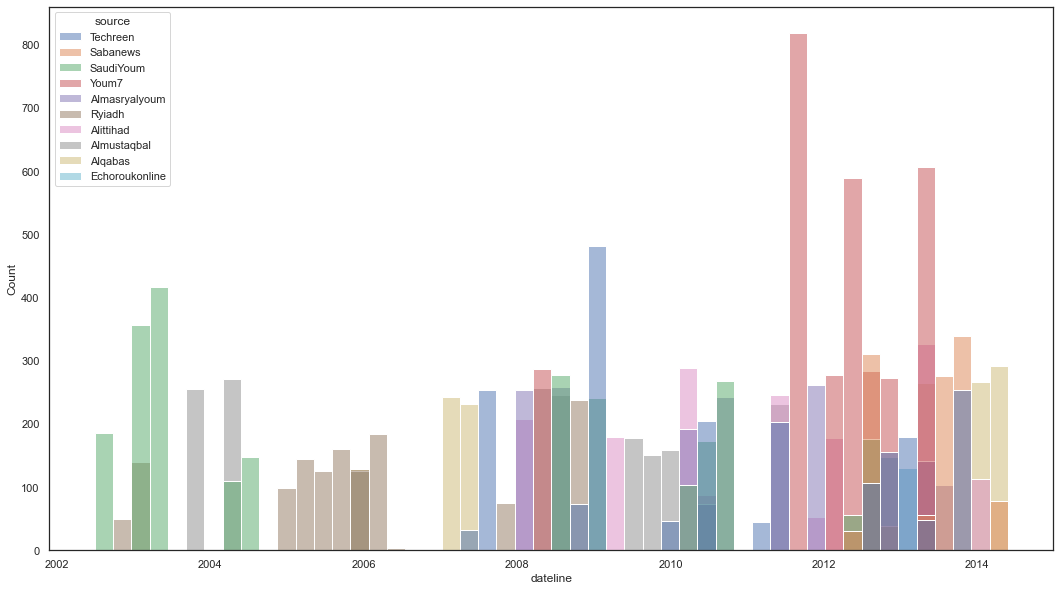

In [23]:
plt.figure(figsize = (18, 10))
sns.histplot(data=encoded, x='dateline', hue= 'source', bins=50)

<Figure size 1296x864 with 0 Axes>

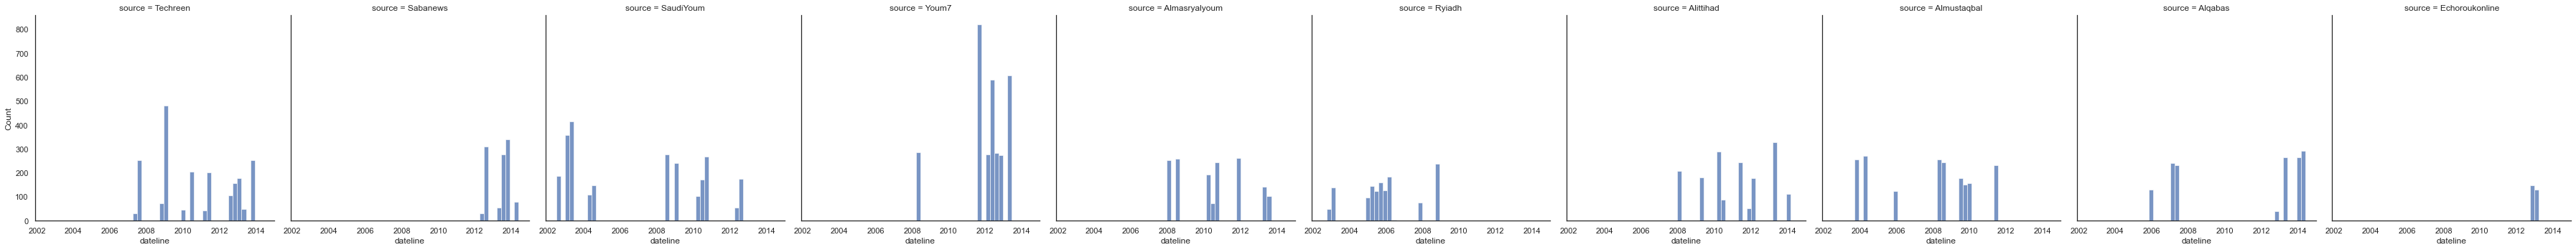

In [24]:
plt.figure(figsize = (18, 12))
sns.displot(data=encoded, x='dateline', col= 'source', bins=50)

### Techreen
- Biggst spike in articles is in 2009 
        events:
        - Barack as 1st president in Jan 2009.
#### Sabanews
- Most articles written around 2012-2014.
#### SaudiYourm
- Most of the articles were written 2002-2004.
        Events: 
        - Iraq War
#### Yourm7
- One small time for articles in 2008 , Great Recession?
- Most articles written between 2012 - 2014 
            Events: 
            - ISIS?
#### Almasryalyoum
- 2008 - 2013
#### Ryiadh
- 2003 - 2009
#### Alittihad 
- 2008 - 2014
#### Almustaqbal
- 2004 - 2011
#### Alqabas
- 2006 - 2014
#### Echoroukonline
Not significant, very little amount of articles only in 2013.

In [13]:
df = encoded.set_index('dateline').sort_index()

In [14]:
df.columns

Index(['index', 'Unnamed: 0', 'id', 'url', 'headline', 'text', 'tags',
       'source', 'text_label', 'text_score', 'headline_label',
       'headline_score', 'text_label_negative', 'text_label_neutral',
       'text_label_positive'],
      dtype='object')

In [15]:
df.shape

(16979, 15)

In [16]:
df.info

<bound method DataFrame.info of             index  Unnamed: 0               id  \
dateline                                         
2002-07-01    293      189146  SYM_ARB_0002704   
2002-07-01    288      189141  SYM_ARB_0002614   
2002-07-01    290      189143  SYM_ARB_0002644   
2002-07-01    292      189145  SYM_ARB_0002684   
2002-07-01    295      189148  SYM_ARB_0002732   
...           ...         ...              ...   
2014-05-26     84      188937  SBN_ARB_0092108   
2014-05-26     83      188936  SBN_ARB_0092107   
2014-05-26     82      188935  SBN_ARB_0092094   
2014-05-26     79      188932  SBN_ARB_0092053   
2014-05-26     81      188934  SBN_ARB_0092078   

                                                          url  \
dateline                                                        
2002-07-01  http://www.alyaum.com/oldsite/issue/article.ph...   
2002-07-01  http://www.alyaum.com/oldsite/issue/article.ph...   
2002-07-01  http://www.alyaum.com/oldsite/issue/article.p

In [17]:
df.headline_label.value_counts()

neutral     12296
negative     3629
positive     1054
Name: headline_label, dtype: int64

In [18]:
df.tags.value_counts()

['واشنطن']                                                                      3461
['القاعدة']                                                                     2864
['أمريكا']                                                                      2273
['بوش']                                                                         2208
['أوباما']                                                                      1003
                                                                                ... 
['أمريكا', 'كلينتون', 'القاعدة']                                                   1
['أمريكا', 'بوش', 'تشيني', '11 سبتمبر']                                            1
['أمريكا', 'أوباما', 'كلينتون', 'أسامة بن لادن', 'القاعدة']                        1
['أمريكا', 'واشنطن', 'بوش', 'أوباما', 'كلينتون', 'أسامة بن لادن', 'القاعدة']       1
['واشنطن', 'غوغل', 'فيسبوك']                                                       1
Name: tags, Length: 248, dtype: int64

In [19]:
df.text_label.value_counts()

neutral     12309
negative     3971
positive      699
Name: text_label, dtype: int64

In [20]:
df.source.value_counts()

Youm7             3134
SaudiYoum         2510
Techreen          2083
Almustaqbal       1870
Alittihad         1680
Almasryalyoum     1526
Alqabas           1463
Ryiadh            1347
Sabanews          1089
Echoroukonline     277
Name: source, dtype: int64

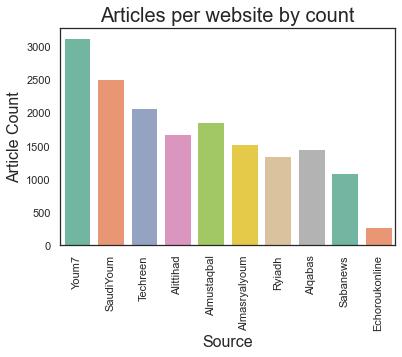

In [21]:
sns.set_theme(style="white")
ax = sns.countplot(x="source", data=df, palette="Set2",order = new['source'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Source', size = 16)
ax.set_ylabel('Article Count', size = 16)
ax.set_title("Articles per website by count", size = 20)
plt.show()

Takeaways:
    
    - Huge spike in articles written around 2011. 
    - Most of the articles are written by the souce Yourm7, which is also the top source overall.
    - The other 2 highest times for articles written:
        - Right after 2012 - don't have an event for beginning - mid of 2012?
        - Beginning of 2013 - Boston Marathon shooting?

In [27]:
def country_tagger(df):
    country_map = { 'Alittihad': 'emirates',
                    'Echoroukonline': 'algeria',
                    'Ryiadh': 'ksa',
                    'SaudiYoum': 'ksa',
                    'Techreen': 'syria',
                    'Alqabas': 'kuwait',
                    'Almustaqbal': 'lebanon',
                    'Almasryalyoum': 'egypt',
                    'Youm7': 'egypt',
                    'Sabanews': 'yemen',
                    }
    df['country'] = df.source.map(country_map)
    return df

In [28]:
country_tagger(df)

,index,Unnamed: 0,id,url,headline,text,tags,source,text_label,text_score,headline_label,headline_score,text_label_negative,text_label_neutral,text_label_positive,country
dateline,,,,,,,,,,,,,,,,
2002-07-01,293,189146,SYM_ARB_0002704,http://www.alyaum.com/oldsite/issue/article.ph...,نائب خادم الحرمين الشريفين يستقبل عضوا في الكو...,استقبل صاحب السمو الملكي الامير عبدالله بن عبد...,['واشنطن'],SaudiYoum,neutral,0.9865078926086426,neutral,0.996348,0,1,0,ksa
2002-07-01,288,189141,SYM_ARB_0002614,http://www.alyaum.com/oldsite/issue/article.ph...,شروط العقار,لايزال الاستثمار العقاري يعد من القنوات الاستث...,['القاعدة'],SaudiYoum,neutral,0.8431360125541687,neutral,0.975554,0,1,0,ksa
2002-07-01,290,189143,SYM_ARB_0002644,http://www.alyaum.com/oldsite/issue/article.ph...,"""""بالاديوم"""" لتحسين الأمن الحاسوبي",كشفت شركة مايكروسوفت للبرمجيات عن مشروع جديد ط...,['واشنطن'],SaudiYoum,neutral,0.9165139198303223,positive,0.499695,0,1,0,ksa
2002-07-01,292,189145,SYM_ARB_0002684,http://www.alyaum.com/oldsite/issue/article.ph...,رونالدو يقود السامبا للتحليق بكأس العالم الخامسة,ختم رونالدو مونديال 2002 في كوريا الجنوبية وال...,['أمريكا'],SaudiYoum,neutral,0.9760348002115885,neutral,0.501716,0,1,0,ksa
2002-07-01,295,189148,SYM_ARB_0002732,http://www.alyaum.com/oldsite/issue/article.ph...,أمريكا تجري مشاورات مع الأصدقاء العرب لدفع عمل...,أكد مساعد وزير الخارجية الامريكى لشئون الشرق ا...,['بوش'],SaudiYoum,neutral,0.9650866985321045,neutral,0.860890,0,1,0,ksa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-26,84,188937,SBN_ARB_0092108,http://www.sabanews.net/ar/news354901.htm,وزير الداخلية يناقش مع قيادة محافظة صنعاء الأو...,26/مايو/2014] صنعاء - سبأنت: ناقش اجتماع بمحا...,['القاعدة'],Sabanews,neutral,0.9158061146736145,neutral,0.992118,0,1,0,yemen
2014-05-26,83,188936,SBN_ARB_0092107,http://www.sabanews.net/ar/news354899.htm,محافظ أبين يشيد بإنجاز فريق فحمان وصعوده للدور...,26/مايو/2014] زنجبار – سبأنت : أشاد محافظ أبين...,['القاعدة'],Sabanews,positive,0.6742833852767944,positive,0.832440,0,0,1,yemen
2014-05-26,82,188935,SBN_ARB_0092094,http://www.sabanews.net/ar/news354885.htm,افتتاح وتأسيس مشاريع تنموية وخدمية بأبين بتكلف...,26/مايو/2014] أبين - سبأنت: افتتح محافظ أبين ...,['القاعدة'],Sabanews,positive,0.575439453125,neutral,0.719872,0,0,1,yemen


## What’s the relationship between article sentiment and world events?

- Hypothesis Testing not possible currently

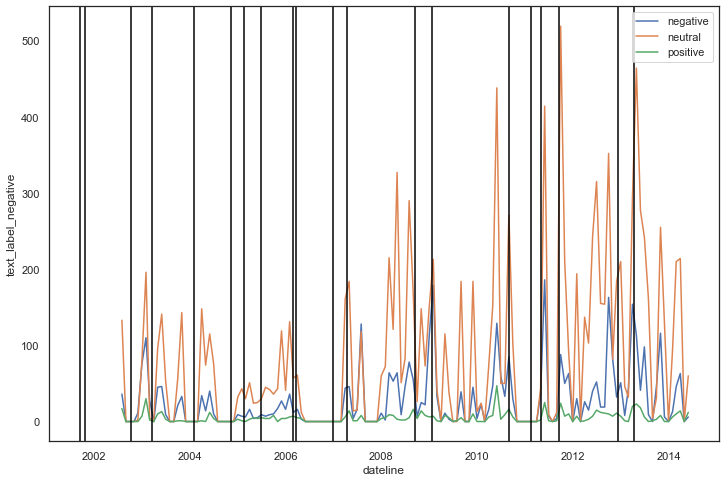

In [59]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df.resample('1M').sum(), x = 'dateline', y = 'text_label_negative', label = 'negative')
sns.lineplot(data = df.resample('1M').sum(), x = 'dateline', y = 'text_label_neutral', label = 'neutral')
sns.lineplot(data = df.resample('1M').sum(), x = 'dateline', y = 'text_label_positive', label = 'positive')
plt.axvline(dt.datetime(2001, 9, 11),  color = 'black') ## 9/11
plt.axvline(dt.datetime(2001, 10, 22), color = 'black') ## US leads assault on Taliban in Afghanistan
plt.axvline(dt.datetime(2002, 10, 11), color = 'black') ## Congress authorizes forces against Iraq
plt.axvline(dt.datetime(2003, 3, 19), color = 'black') ## US invades Iraq, starting war
plt.axvline(dt.datetime(2004, 2, 4), color = 'black') ## Facebook is formed
plt.axvline(dt.datetime(2004, 11, 7), color = 'black') ## Start of the Second Battle of Fallujah
plt.axvline(dt.datetime(2005, 2, 14), color = 'black') ## Youtube is created
plt.axvline(dt.datetime(2005, 6, 23), color = 'black') ## Reddit is created
plt.axvline(dt.datetime(2006, 2, 22), color = 'black') ## al-Askari Mosque bombing, Start of Iraqi War
plt.axvline(dt.datetime(2006, 3, 21), color = 'black') ## Twitter is created
plt.axvline(dt.datetime(2006, 12, 30), color = 'black') ## Saddam Hussein executed
plt.axvline(dt.datetime(2007, 4, 16), color = 'black') ## Virginia Tech Mass Shooting
plt.axvline(dt.datetime(2008, 9, 15), color = 'black') ## Start of Great Recession
plt.axvline(dt.datetime(2009, 1, 20), color = 'black') ## Barack Obama elected first black president
plt.axvline(dt.datetime(2010, 8, 30), color = 'black') ## US combat roll in Iraq ends
plt.axvline(dt.datetime(2011, 2, 14), color = 'black') ## Start of Arab Spring
plt.axvline(dt.datetime(2011, 5, 2), color = 'black') ## Navy Seals take down Osama Bin Laden
plt.axvline(dt.datetime(2011, 9, 19), color = 'black') ## Occupy Wallstreet
plt.axvline(dt.datetime(2012, 12, 14), color = 'black') ## Sandy Hook Shooting
plt.axvline(dt.datetime(2013, 4, 15), color = 'black') ## Boston Marathon Bombing


plt.legend()